In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

import control
from plot_tools import plot_states, plot_response
%matplotlib inline

In [16]:
L = 4;
b_f= 0;
m = 10;
g = 9.8;
M = 100;
c_f = 50

x_labels = ["\\dot{\\alpha}",
            "\\alpha",
            "\\dot{q}",
            "q",
            ]


A = np.array([
    [-b_f/L, -(g*(1 + m/M))/L,   -c_f / M / L, 0],
    [1,       0,                  0,           0],
    [0,      -(m*g/M),           -c_f/M,       0],
    [0,       0,                  1,           0],   
])

B = np.array([
    [1/L/M],
    [0],
    [1/M],
    [0]
])

C = np.array([[0, 1, 0, 0]])

print("Eigenvalues of A:")
for ev in np.linalg.eig(A)[0]:
    print(ev)

Eigenvalues of A:
0j
(-0.02108720998834182+1.6356181709943598j)
(-0.02108720998834182-1.6356181709943598j)
(-0.45782558002331647+0j)


In [17]:
x0 = np.array([[0], [0], [1], [0]])

T = 60
dt= 0.1
t = np.arange(0, T, dt)

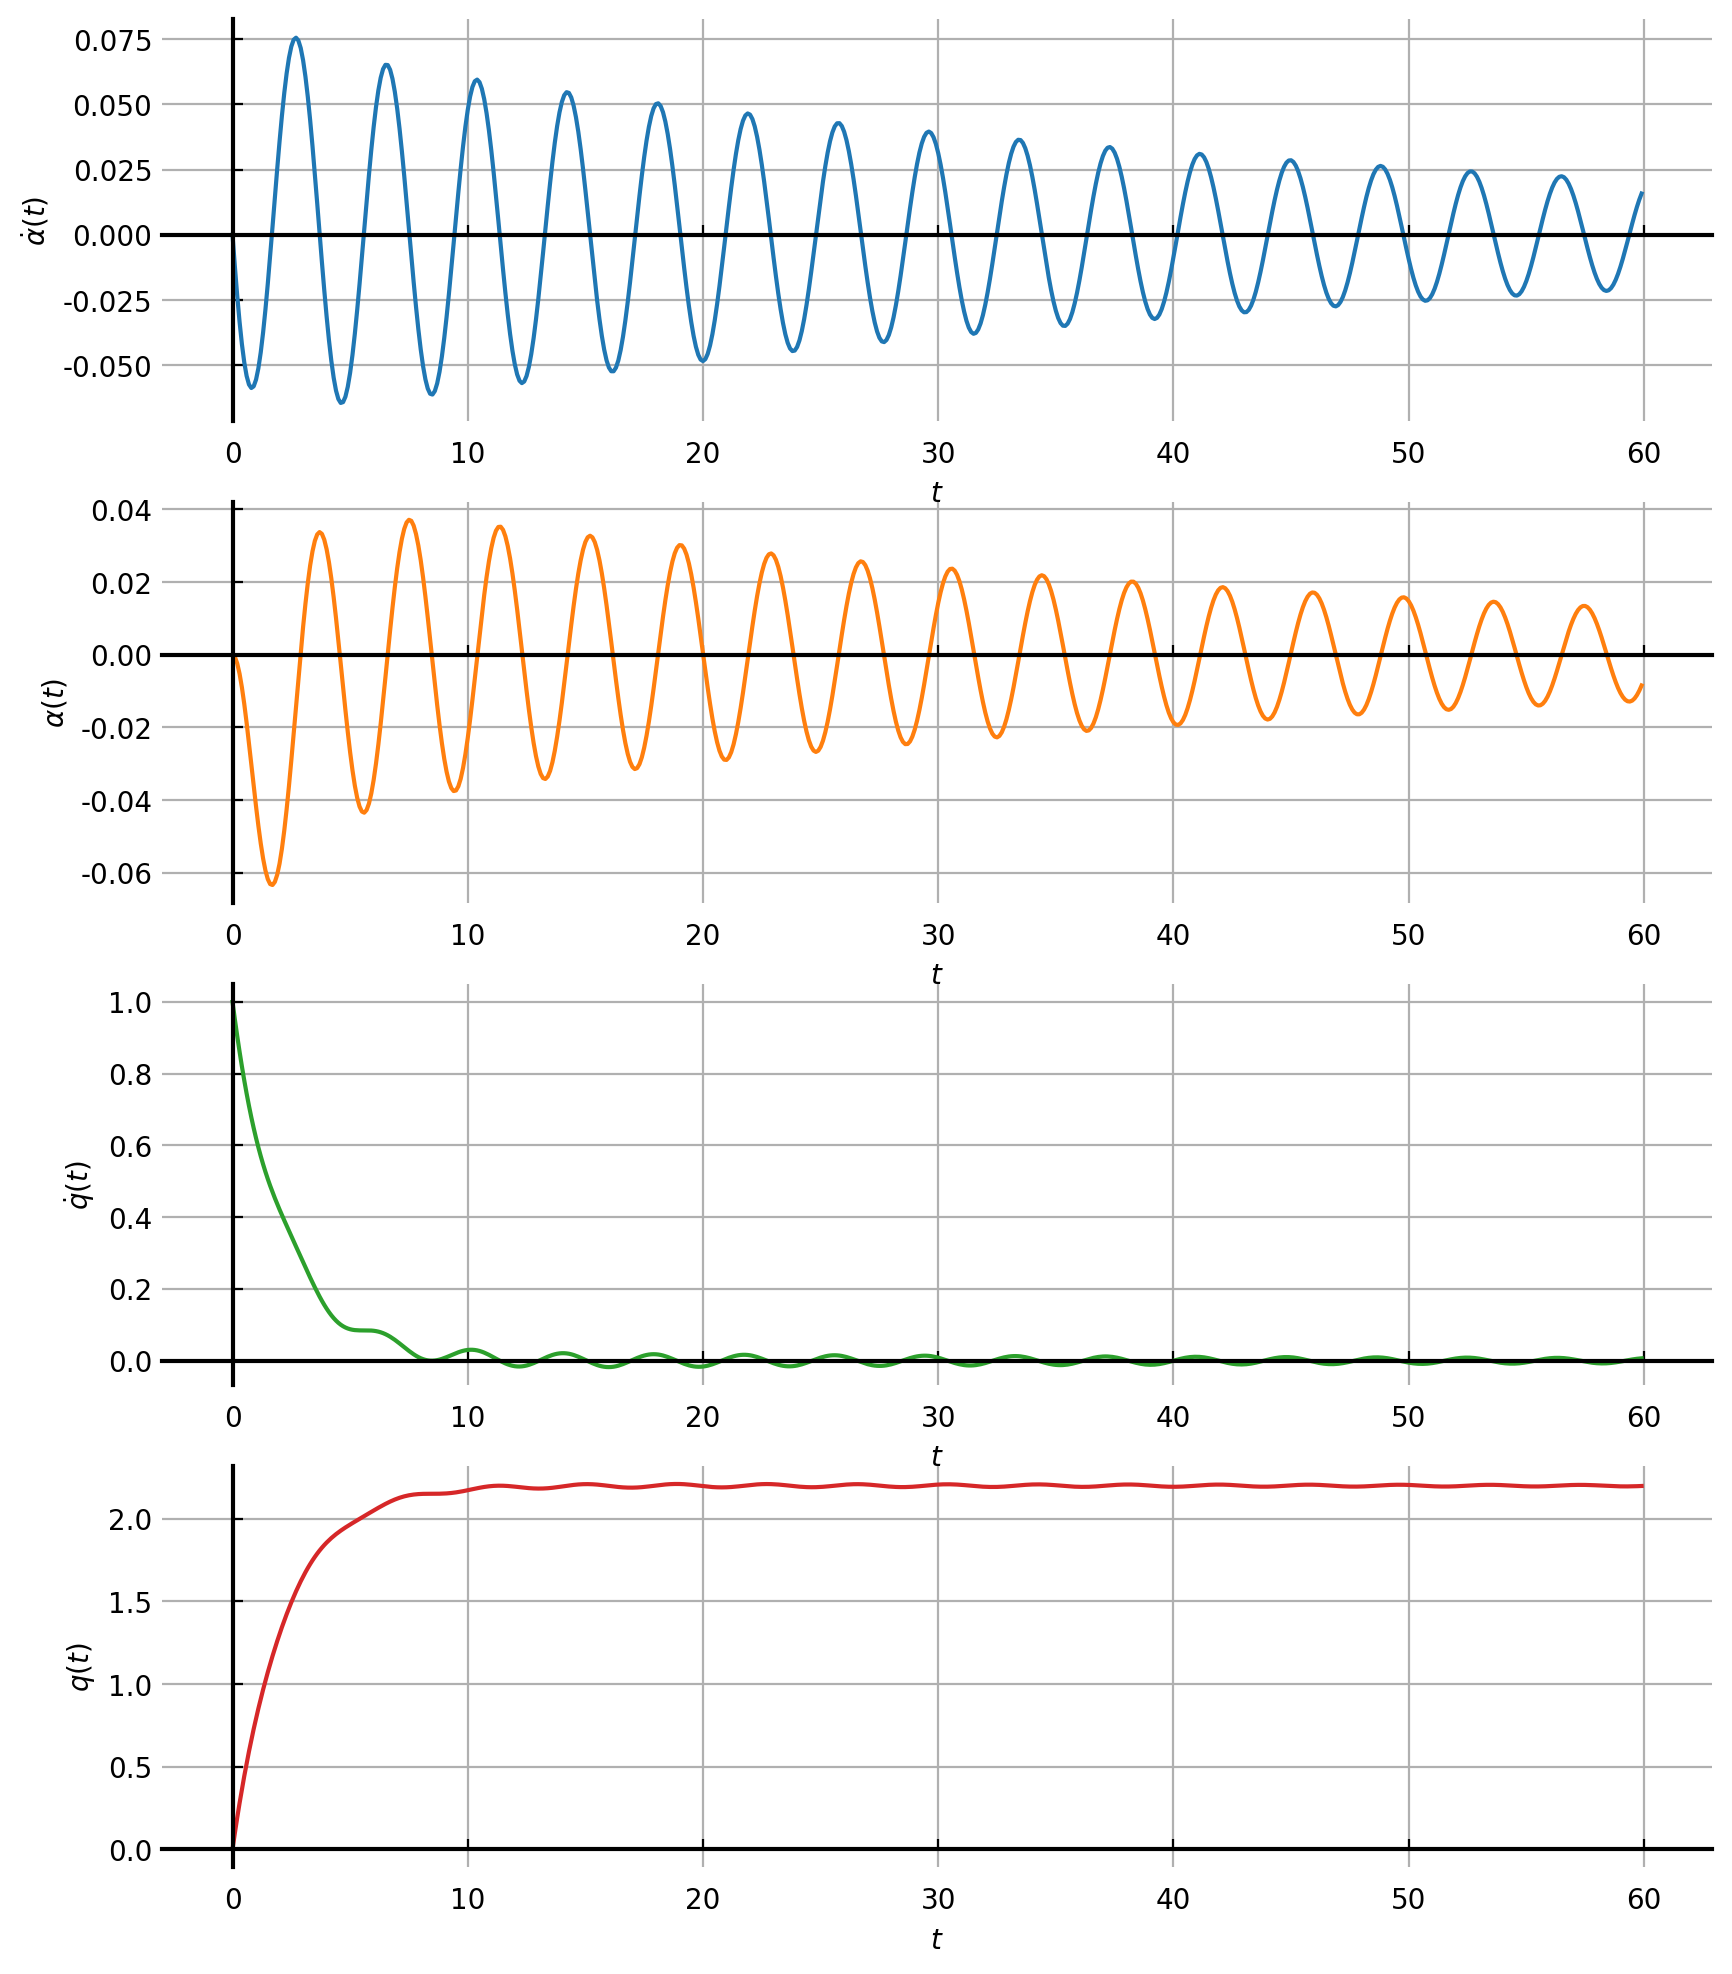

In [18]:
x_exp = np.zeros([len(x0), len(t)])

for i, t_ in enumerate(t):
    x_exp[:, i] = (linalg.expm(A*t_) @ x0)[:, 0]
    
fig, ax = plot_states(t, x_exp, x_labels=x_labels)



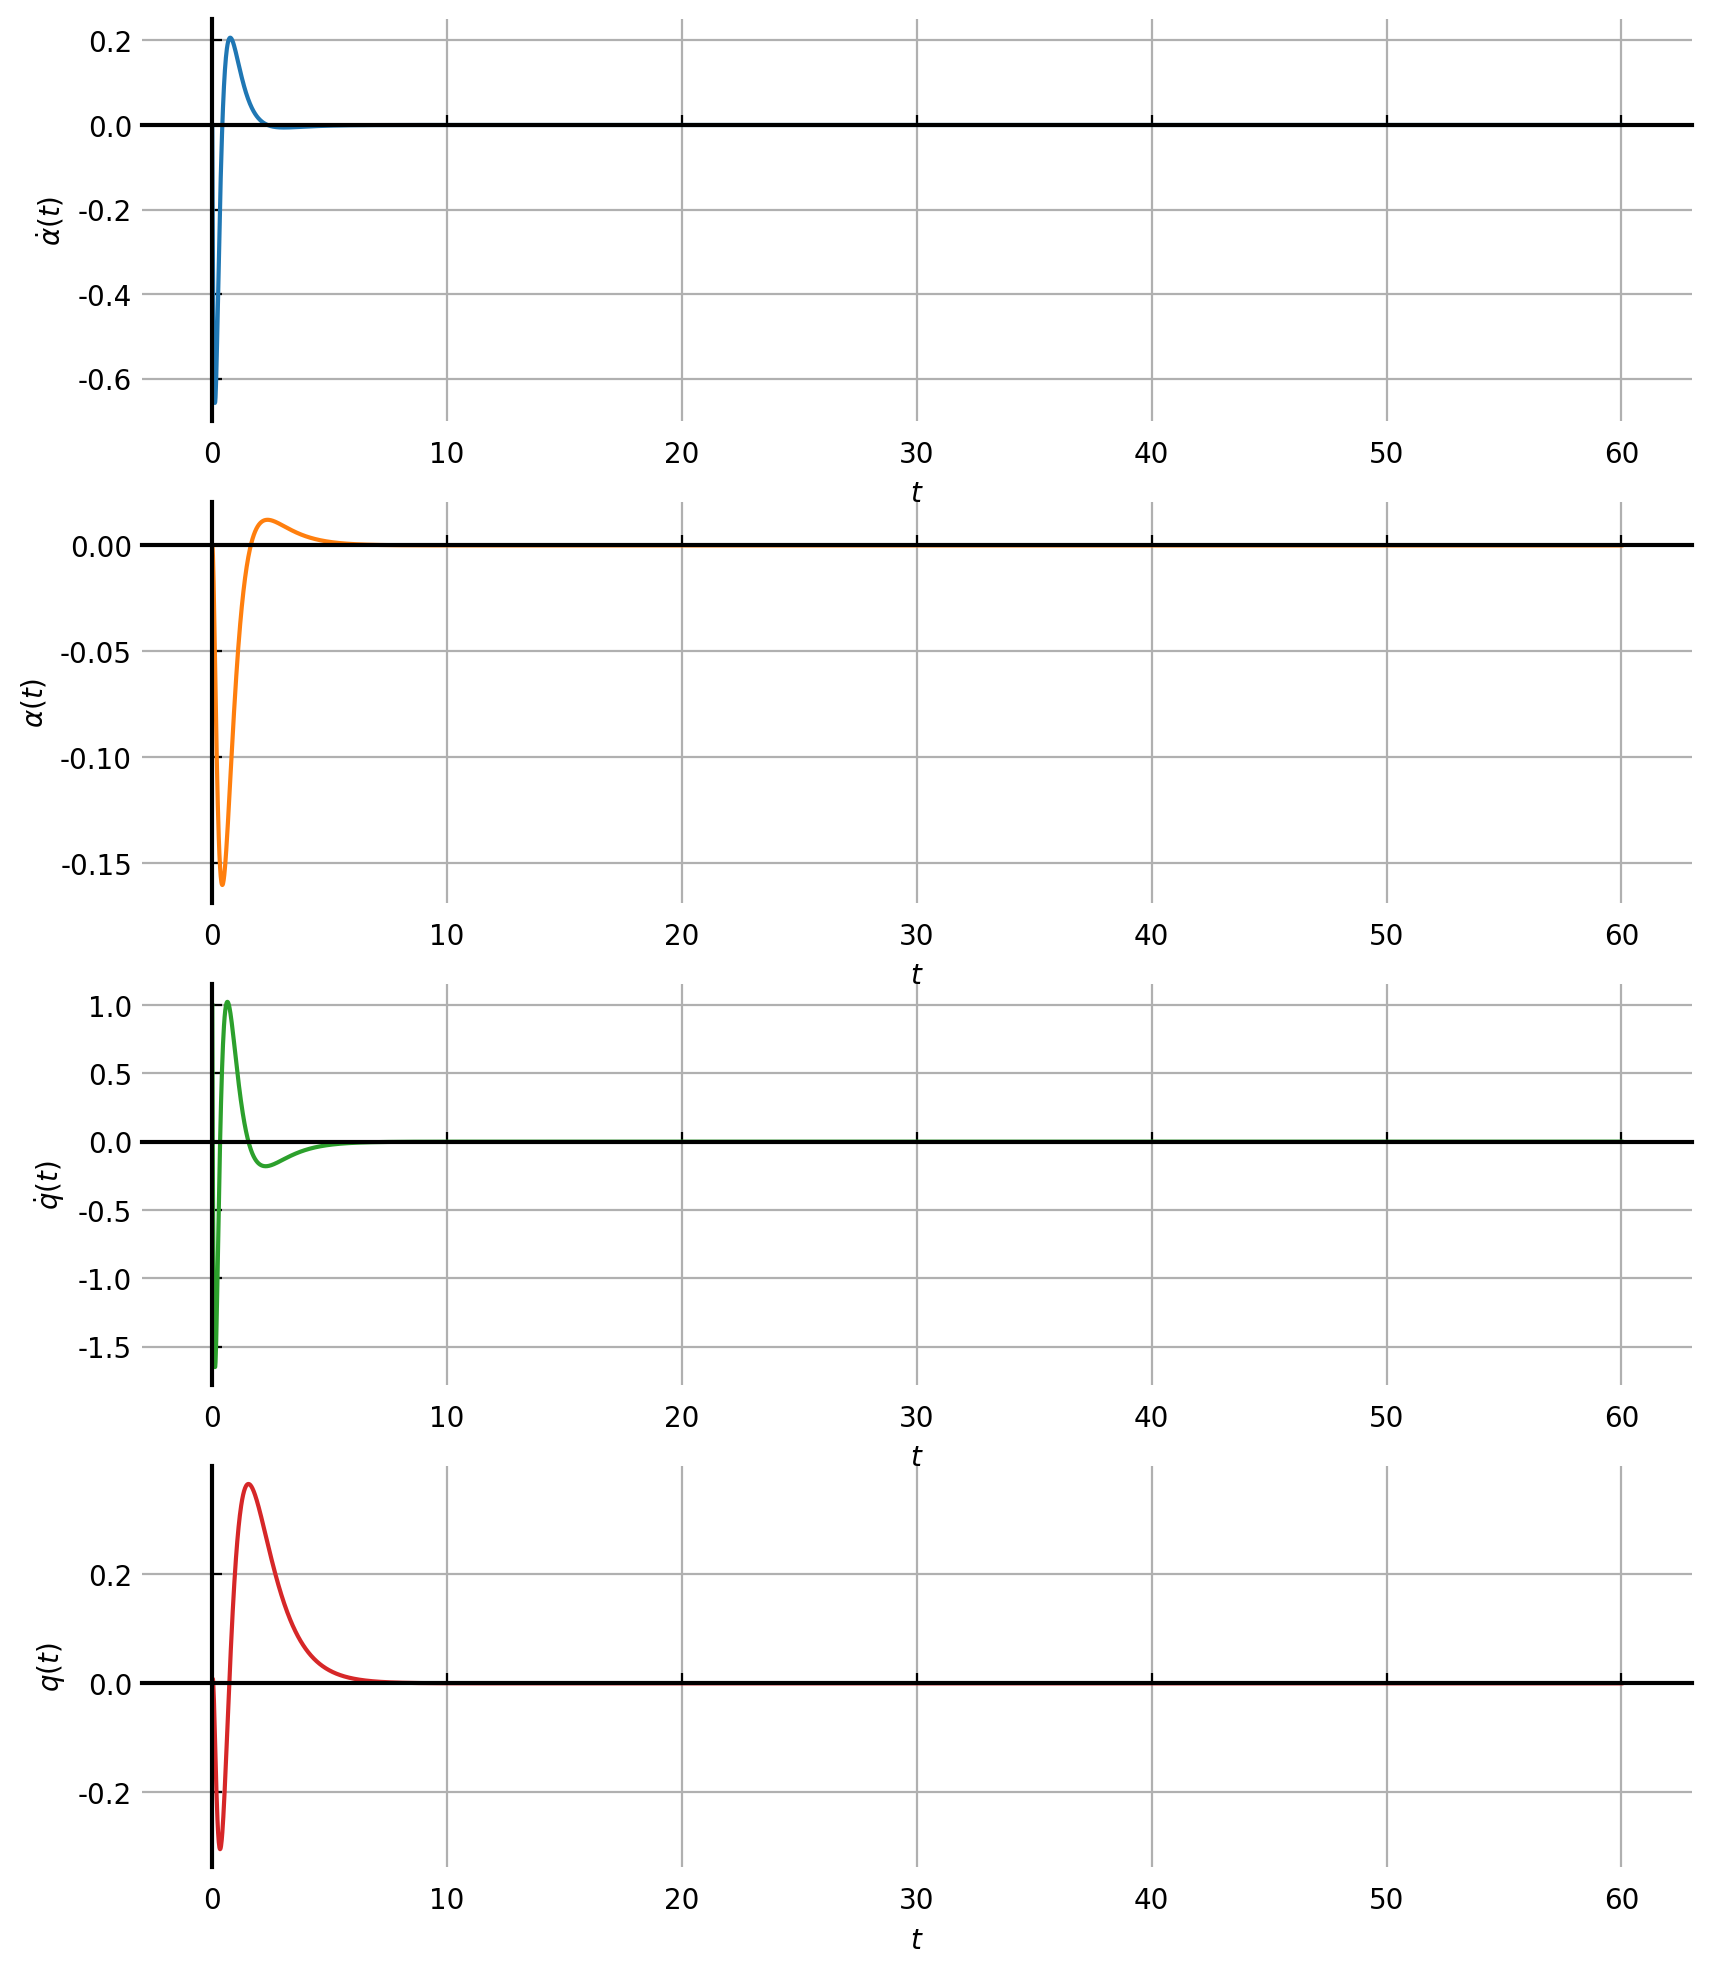

In [19]:
K = control.place(A, B, [-10, -4, -2, -1])

sys = control.ss(A - B * K, B, C, 0)



[t_sim, y_sim, x_sim] = control.initial_response(sys, T=T, X0=x0, return_x=True)


fig, ax = plot_states(t_sim, x_sim, x_labels=x_labels)
fig.savefig(f'crane-initial.eps', bbox_inches='tight')


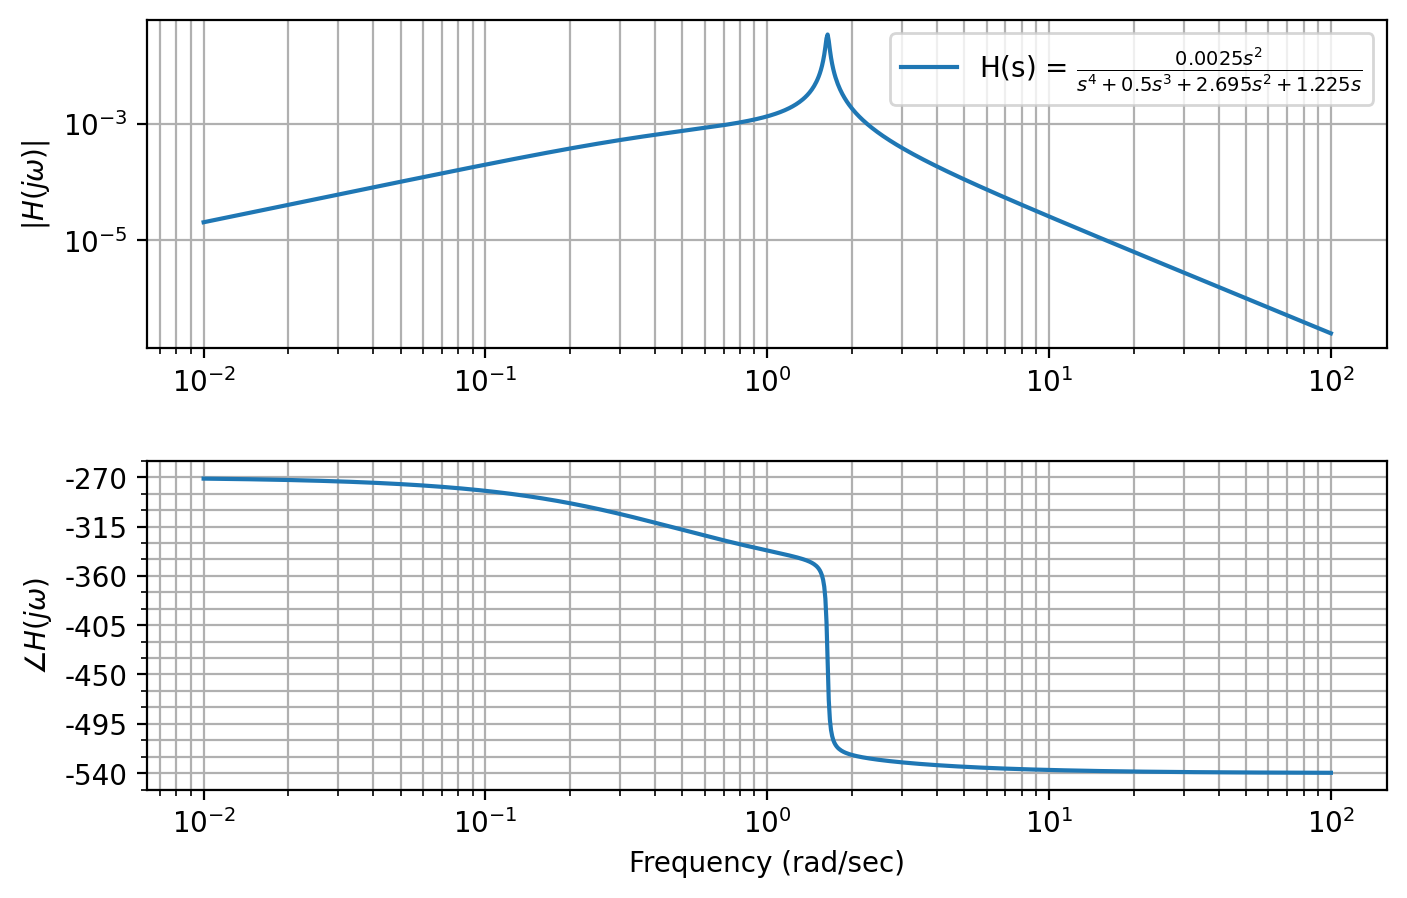

In [20]:
H = control.tf(sys)
H = control.tf([0.0025, 0, 0], [1, 0.5, 2.695, 1.225, 0])

# Bode plot
fig, ax = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 0.2, 3]}, figsize=(8, 5), dpi=200)
control.bode_plot(H, sisotool="", omega_limits=[1e-2, 1e2], fig=fig, label=f"H(s) = {H._repr_latex_()[1:-1]}");
ax[1].axis('off');
ax[0].legend()
ax[0].set_ylabel("$| H(j\\omega)|$")
ax[2].set_ylabel("$\\angle H(j\\omega)$");

# fig.savefig(f'bodeplot-crane.eps', bbox_inches='tight')


In [21]:
omegas = [0.5, 1, 1.65, 3, 8]
amplitudes = [1, 1, 1, 1, 1]

N_waves = 5
T = N_waves* 2 * np.pi / omegas[0]
dt = 0.01
t = np.arange(0, T, dt)


u_sim = [None] * len(omegas)
t_sim = [None] * len(omegas)
y_sim = [None] * len(omegas)
y_analytic = [None] * len(omegas)

u_sim_tot = np.zeros(t.shape)
for i, (omega, amp) in enumerate(zip(omegas, amplitudes)):
    u_sim[i] =  amp * np.sin(omega * t)
    u_sim_tot += u_sim[i]





In [13]:

y_sim_loop = np.zeros(t.shape)


for i, u in enumerate(u_sim):
    [t_sim[i], y_sim[i]] = control.forced_response(H, T=t, U=u)
    y_sim_loop += y_sim[i]


[t_sim_tot, y_sim_tot] = control.forced_response(H, T=t, U=u_sim_tot)

fig, ax = plot_response(t_sim_tot, u_sim_tot, y_sim_tot, label='Control toolbox');


ax[1].plot(t, y_sim_loop, 'k:', label="Solution from loop");
ax[1].legend();

In [14]:
fig.savefig(f'crane-multisine.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
